In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

**IMPORTING DATASET**

In [2]:
train_dataset = pd.read_excel('train.xlsx')
X_train = train_dataset.iloc[:, :-1].values
y_train = train_dataset.iloc[:, -1].values
test_dataset = pd.read_excel('test.xlsx')
X_test = test_dataset.iloc[:,:]


**TASK-1**

**K-MEANS CLUSTERING**

*Using The Elbow Method To Find The Optimal Number Of Clusters*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

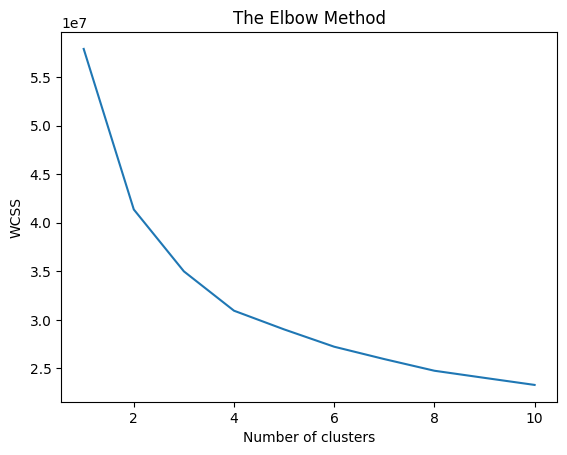

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

*Training The K-Means Model On The Dataset*

In [4]:
# The number of clusters found is 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 1, ..., 3, 3, 2], dtype=int32)

***Inout From User***

In [5]:
user_data_point_str = "-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63"
                             # Inside the semicolon(" ") User must put thei input seperated by comma(,)
                             # Example: user_data_point_str = "-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57"

user_data_point = list(map(float, user_data_point_str.split(',')))
user_data_point = [user_data_point]  # Convert to a 2D array for prediction

*Predicting The User Input Based On Model*

In [6]:
predicted_cluster = kmeans.predict(user_data_point)

print(f"The data point {user_data_point} belongs to Cluster {predicted_cluster[0]}")

The data point [[-77.0, -74.0, -71.0, -76.0, -65.0, -63.0, -66.0, -52.0, -55.0, -75.0, -72.0, -75.0, -74.0, -61.0, -64.0, -63.0, -53.0, -63.0]] belongs to Cluster 2


**TASK-2**

**USING FEATURE SCALING**

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_fs = sc.fit_transform(X_train)
X_test_fs = sc.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


**Training the KERNEL SVM model on the Training set**

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_fs, y_train)

SVC(random_state=0)

*target values for the test*

In [9]:
y_pred_svm = classifier.predict(X_test_fs) # y_pred_svm is the target values for the test

**TRAINING TEST SET ON NAIVE BAYES**

In [10]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_fs, y_train)

GaussianNB()

*target values for the test*

In [11]:
y_pred_nb = classifier.predict(X_test_fs) # y_pred_nb is the target values for the test

**RANDOM FOREST CLASSIFICATION**

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_fs, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

*Target Values For The Test*

In [13]:
y_pred = classifier.predict(X_test_fs)


**ARTIFICIAL NEURAL NETWOR BASED CLASSIFICATION MODEL**

*Building The ANN Model*

In [14]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


*Using Label Encoding For y_train*

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
print(y_train_le)

[110 137  10 ...  55  91 119]


*Training The ANN Model*

In [16]:
ann.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy' , metrics = ['accuracy'])
ann.fit(X_train, y_train_le, batch_size = 100, epochs = 100)


Epoch 1/100
368/368 [==============================] - 1s 2ms/step - loss: -66195.8359 - accuracy: 0.0056
Epoch 2/100
368/368 [==============================] - 1s 2ms/step - loss: -482118.0938 - accuracy: 0.0056
Epoch 3/100
368/368 [==============================] - 1s 2ms/step - loss: -1583163.8750 - accuracy: 0.0056
Epoch 4/100
368/368 [==============================] - 1s 2ms/step - loss: -3688708.2500 - accuracy: 0.0056
Epoch 5/100
368/368 [==============================] - 1s 2ms/step - loss: -7122976.0000 - accuracy: 0.0056
Epoch 6/100
368/368 [==============================] - 1s 2ms/step - loss: -12198463.0000 - accuracy: 0.0056
Epoch 7/100
368/368 [==============================] - 1s 2ms/step - loss: -19240954.0000 - accuracy: 0.0056
Epoch 8/100
368/368 [==============================] - 1s 3ms/step - loss: -28530704.0000 - accuracy: 0.0056
Epoch 9/100
368/368 [==============================] - 1s 3ms/step - loss: -40453208.0000 - accuracy: 0.0056
Epoch 10/100
368/368 [=====

*target values for the test*

In [17]:
y_pred = ann.predict(X_test_fs)
y_pred = (y_pred > 0.5)


493/493 [==============================] - 1s 2ms/step


**TASK 3**

In [18]:
dataset = pd.read_excel('rawdata.xlsx')
dataset['datetime'] = pd.to_datetime(dataset['date'])

# Dropping The Unnecessary Columns

dataset = dataset.drop(['date', 'time'], axis=1)

# Filtering Rows With 'placed' Activity For Inside And Outside

inside_placed = dataset[(dataset['activity'] == 'placed') & (dataset['position'].str.lower() == 'inside')]
outside_placed = dataset[(dataset['activity'] == 'placed') & (dataset['position'].str.lower() == 'outside')]

# Calculating Date-Wise Total Duration For Inside And Outside

inside_duration = inside_placed.groupby(inside_placed['datetime'].dt.date)['number'].count()
outside_duration = outside_placed.groupby(outside_placed['datetime'].dt.date)['number'].count()

# Filtering Rows With 'picked' Activity For Inside And Outside

inside_picked = dataset[(dataset['activity'] == 'picked') & (dataset['position'].str.lower() == 'inside')]
outside_picked = dataset[(dataset['activity'] == 'picked') & (dataset['position'].str.lower() == 'outside')]

# Calculating Date-Wise Number Of Picking Activities For Inside And Outside

inside_picking_count = inside_picked.groupby(inside_picked['datetime'].dt.date)['number'].count()
outside_picking_count = outside_picked.groupby(outside_picked['datetime'].dt.date)['number'].count()

**Display The Results**

In [19]:
print("Date-wise Total Duration for Inside:")
print(inside_duration)

print("\nDate-wise Total Duration for Outside:")
print(outside_duration)

print("\nDate-wise Number of Picking Activities for Inside:")
print(inside_picking_count)

print("\nDate-wise Number of Picking Activities for Outside:")
print(outside_picking_count)


Date-wise Total Duration for Inside:
datetime
2024-01-16    40
2024-01-17     9
2024-01-18    38
Name: number, dtype: int64

Date-wise Total Duration for Outside:
datetime
2024-01-18    1
Name: number, dtype: int64

Date-wise Number of Picking Activities for Inside:
datetime
2024-01-16    40
2024-01-17    10
2024-01-18    34
Name: number, dtype: int64

Date-wise Number of Picking Activities for Outside:
datetime
2024-01-18    3
Name: number, dtype: int64
